In [61]:
import numpy as np
import tensorflow as tf

In [62]:
# load and split data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [89]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))  # 2 layers of 128 worked the best (~95%)
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [90]:
# tell the model what loss/optimizer to use
model.compile(
 optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),  # use crossentropy because there is >=2 classes
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],  # way of evaluating performance
)

In [91]:
model.fit(x_train, y_train, epochs=10)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"accuracy={accuracy}", f"loss={loss}")

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7070 - sparse_categorical_accuracy: 0.8781
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.9253
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2270 - sparse_categorical_accuracy: 0.9434
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1697 - sparse_categorical_accuracy: 0.9549
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9592
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1314 - sparse_categorical_accuracy: 0.9628
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1213 - sparse_categorical_accuracy: 0.9663
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - sparse_categorical_accuracy: 0.9699
Epoch 9/10
1875/1875 [==========

# Creating Your Own Data
1. Open MS Paint
2. Set canvas size to 28px by 28px
3. Draw a digit
4. Save as \<digit\>.png, eg 2.png
5. Drag imgage into project folder (left)
6. Edit `for` loop to pick the correct file names

the result is 1 (99.9990%)


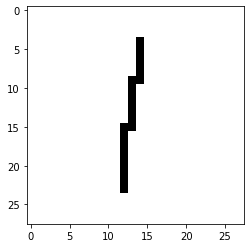

the result is 2 (100.0000%)


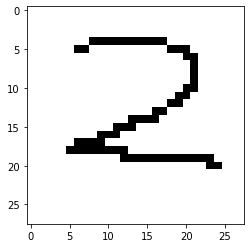

the result is 3 (99.4107%)


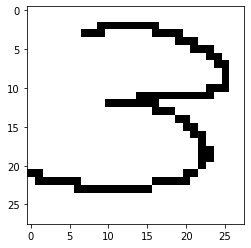

In [93]:
import cv2
import matplotlib.pyplot as plt

for i in [1,2,3]:
  img = cv2.imread(f"{i}.png")[:,:,0]
  img = np.invert(np.array([img]))

  pre = model.predict(img)  # list[list[float]]
  print(f"the result is {(np.argmax(pre))} ({pre[0][np.argmax(pre)]*100:.4f}%)")

  plt.imshow(img[0], cmap=plt.cm.binary)
  plt.show()